In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import shutil
## original data directory and making training,validation and testing directory

original_dataset_dir='/home/ai-ee/Downloads/kaggle_original_data/train'
base_dir='/home/ai-ee/Downloads/cats_and_dogs_small'

os.mkdir(base_dir)


In [3]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [4]:
validation_dir=os.path.join(base_dir,'validation')

In [5]:
os.mkdir(validation_dir)

In [6]:
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [7]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

In [8]:
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

In [9]:
test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [10]:
###  copying the first 1000 cat images in train_cats_dir
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copy(src,dst)

In [11]:
### Copying the next 500 cat images to validation_cats_dir 
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copy(src,dst)

In [12]:
### Copying the next 500 cat images to test_cats_dir
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copy(src,dst)

In [13]:
### similary do it for dog images (1000 for training ,500 for validation and 500 for testing)
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copy(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copy(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copy(src,dst)


In [14]:
# sanity check

print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [17]:
# CNN network

from keras import models
from keras import layers


In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()
          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [20]:
from keras import optimizers

In [21]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [22]:
# preprocessing images of dogs and cats
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [24]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [26]:
## looking at the output of of one of these generators: yields batches of 150*150 RGB images of shape (20,150,150,3) 
#  and binary labels (shape(20,))
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [27]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6946 - acc: 0.5090 - val_loss: 0.7070 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6575 - acc: 0.5995 - val_loss: 0.6440 - val_acc: 0.5890
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6033 - acc: 0.6710 - val_loss: 0.6486 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 6s 65ms/step - loss: 0.5669 - acc: 0.7010 - val_loss: 0.6047 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 7s 65ms/step - loss: 0.5419 - acc: 0.7205 - val_loss: 0.6000 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 6s 65ms/step - loss: 0.5125 - acc: 0.7360 - val_loss: 0.5916 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.4897 - acc: 0.7630 - val_loss: 0.6041 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 6s 64ms/step 

In [28]:
model.save('cats_and_dogs_small_1.h5')

In [29]:
import matplotlib.pyplot as plt

In [35]:
#print(history.history.keys())
acc=history.history['acc']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
loss=history.history['loss']

epochs=range(1,len(acc)+1)

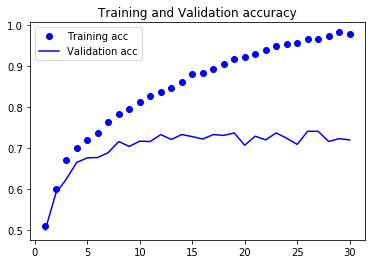

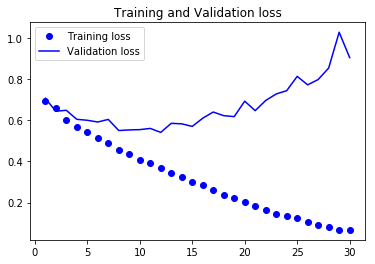

In [37]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [38]:
# data augmentation to reduce overfitting

datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [47]:
from keras.preprocessing import image

In [52]:
#print(len(os.listdir(train_cats_dir)))
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

In [54]:
img_path=fnames[3]

img=image.load_img(img_path,target_size=(150,150))

In [58]:
x=image.img_to_array(img)
print(x.shape)

(150, 150, 3)


In [59]:
x=x.reshape((1,)+x.shape)
print(x.shape)

(1, 150, 150, 3)


In [65]:
#i=0

#for batch in datagen.flow(x,batch_size=1):
#    plt.figure(i)
#    imgplot=plt.imshow(image.array_to_img(batch[0]))
#    i+=1
#    if i%4==0:
#        break
#plt.show()


In [67]:
# Adding the dropout layer to convnet defined above

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [68]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [69]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [70]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [71]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [72]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6889 - acc: 0.5413 - val_loss: 0.6783 - val_acc: 0.5654
Epoch 2/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6743 - acc: 0.5822 - val_loss: 0.6816 - val_acc: 0.5406
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6620 - acc: 0.5878 - val_loss: 0.6376 - val_acc: 0.6079
Epoch 4/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6479 - acc: 0.6094 - val_loss: 0.6375 - val_acc: 0.6263
Epoch 5/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6252 - acc: 0.6409 - val_loss: 0.6018 - val_acc: 0.6548
Epoch 6/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6149 - acc: 0.6581 - val_loss: 0.6028 - val_acc: 0.6599
Epoch 7/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6075 - acc: 0.6687 - val_loss: 0.5918 - val_acc: 0.6669
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4093 - acc: 0.8156 - val_loss: 0.4559 - val_acc: 0.8014
Epoch 62/100
100/100 [==============================] - 19s 189ms/step - loss: 0.4246 - acc: 0.8100 - val_loss: 0.4184 - val_acc: 0.8135
Epoch 63/100
100/100 [==============================] - 19s 188ms/step - loss: 0.3953 - acc: 0.8181 - val_loss: 0.4625 - val_acc: 0.8008
Epoch 64/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4075 - acc: 0.8122 - val_loss: 0.4438 - val_acc: 0.8071
Epoch 65/100
100/100 [==============================] - 19s 189ms/step - loss: 0.4103 - acc: 0.8081 - val_loss: 0.4547 - val_acc: 0.8033
Epoch 66/100
100/100 [==============================] - 19s 190ms/step - loss: 0.4058 - acc: 0.8200 - val_loss: 0.4493 - val_acc: 0.8077
Epoch 67/100
100/100 [==============================] - 18s 184ms/step - loss: 0.3961 - acc: 0.8228 - val_loss: 0.4049 - val_acc: 0.8223
Epoch 68/100
100/100 [===================

In [73]:
model.save('cats_and_dogs_small_2.h5')

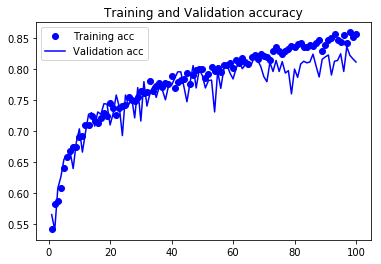

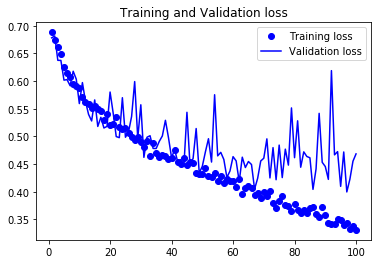

In [74]:
acc=history.history['acc']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
loss=history.history['loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



In [75]:
## using pre-trained convnet to imporve further the accuracy ( using vgg16 model)
from keras.applications import VGG16

In [76]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 600s 10us/step


In [77]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [79]:
## extracting features using pre-trained convolutional base , compiling and fitting
import numpy as np
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

In [85]:
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i* batch_size>=sample_count:
            break
    return features,labels

train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [86]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

In [87]:
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [88]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [89]:
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 540us/step - loss: 0.4402 - acc: 0.7890 - val_loss: 0.3322 - val_acc: 0.8510
Epoch 2/30
2000/2000 [==============================] - 1s 432us/step - loss: 0.2977 - acc: 0.8780 - val_loss: 0.2608 - val_acc: 0.8920
Epoch 3/30
2000/2000 [==============================] - 1s 442us/step - loss: 0.2269 - acc: 0.9115 - val_loss: 0.2386 - val_acc: 0.9070
Epoch 4/30
2000/2000 [==============================] - 1s 427us/step - loss: 0.2068 - acc: 0.9170 - val_loss: 0.2366 - val_acc: 0.9100
Epoch 5/30
2000/2000 [==============================] - 1s 434us/step - loss: 0.1766 - acc: 0.9340 - val_loss: 0.2317 - val_acc: 0.9060
Epoch 6/30
2000/2000 [==============================] - 1s 425us/step - loss: 0.1605 - acc: 0.9325 - val_loss: 0.2426 - val_acc: 0.9080
Epoch 7/30
2000/2000 [==============================] - 1s 431us/step - loss: 0.1259 - acc: 0.9475 - val_loss: 0.2569 - val_acc: 0.9020


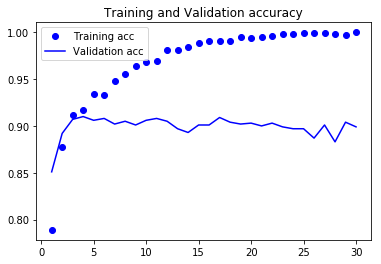

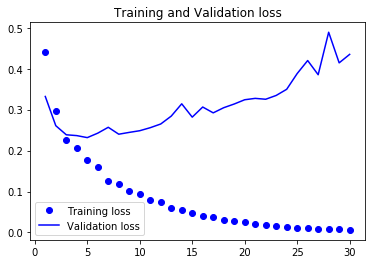

In [90]:
acc=history.history['acc']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
loss=history.history['loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [104]:
## Extracting fetaures with Data Augmentation
### adding a densely connected classifier on top of convolutional base
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [106]:
print('this is the number of trainable weights before feezing the conv base:',len(model.trainable_weights))

this is the number of trainable weights before feezing the conv base: 4


In [107]:
conv_base.trainable=False

In [108]:
print('this is the number of trainable weights after feezing the conv base:',len(model.trainable_weights))

this is the number of trainable weights after feezing the conv base: 4


In [109]:

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [113]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 132ms/step - loss: 0.2086 - acc: 0.9220 - val_loss: 0.2541 - val_acc: 0.9100
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.2337 - acc: 0.9030 - val_loss: 0.2602 - val_acc: 0.9050
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.2089 - acc: 0.9100 - val_loss: 0.2544 - val_acc: 0.9080
Epoch 4/30
100/100 [==============================] - 12s 123ms/step - loss: 0.2277 - acc: 0.9035 - val_loss: 0.2507 - val_acc: 0.9120
Epoch 5/30
100/100 [==============================] - 12s 118ms/step - loss: 0.2342 - acc: 0.9010 - val_loss: 0.2506 - val_acc: 0.9080
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.2197 - acc: 0.9060 - val_loss: 0.2514 - val_acc: 0.9090
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.2164 - acc: 0.9125 - val_loss: 0.2500 - val_acc: 0.9110
Epoch 8/30
100/100 [==============================] - 1

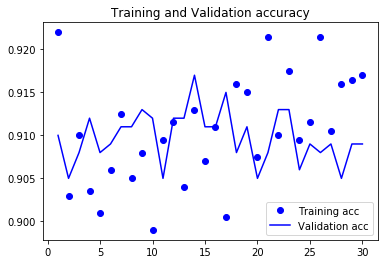

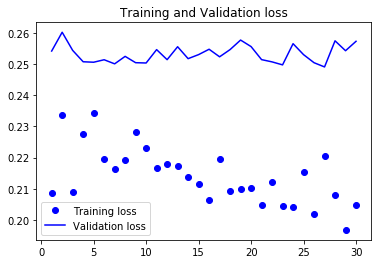

In [114]:
acc=history.history['acc']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
loss=history.history['loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [115]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [119]:
#freezing all layers upto a specific one

conv_base.trainable=True
set_trainable=False

for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [120]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

In [122]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 13s 132ms/step - loss: 0.2270 - acc: 0.9070 - val_loss: 0.2838 - val_acc: 0.9030
Epoch 2/100
100/100 [==============================] - 12s 119ms/step - loss: 0.2215 - acc: 0.9000 - val_loss: 0.2370 - val_acc: 0.9110
Epoch 3/100
100/100 [==============================] - 12s 120ms/step - loss: 0.1808 - acc: 0.9250 - val_loss: 0.2752 - val_acc: 0.9040
Epoch 4/100
100/100 [==============================] - 12s 119ms/step - loss: 0.1811 - acc: 0.9265 - val_loss: 0.2403 - val_acc: 0.9170
Epoch 5/100
100/100 [==============================] - 12s 122ms/step - loss: 0.1864 - acc: 0.9215 - val_loss: 0.2849 - val_acc: 0.9050
Epoch 6/100
100/100 [==============================] - 12s 121ms/step - loss: 0.1609 - acc: 0.9400 - val_loss: 0.2345 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 12s 123ms/step - loss: 0.1612 - acc: 0.9395 - val_loss: 0.2345 - val_acc: 0.9130
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 120ms/step - loss: 0.0330 - acc: 0.9870 - val_loss: 0.3402 - val_acc: 0.9310
Epoch 62/100
100/100 [==============================] - 12s 122ms/step - loss: 0.0343 - acc: 0.9875 - val_loss: 0.3541 - val_acc: 0.9290
Epoch 63/100
100/100 [==============================] - 12s 119ms/step - loss: 0.0422 - acc: 0.9850 - val_loss: 0.3306 - val_acc: 0.9350
Epoch 64/100
100/100 [==============================] - 12s 122ms/step - loss: 0.0317 - acc: 0.9895 - val_loss: 0.3652 - val_acc: 0.9300
Epoch 65/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.3135 - val_acc: 0.9330
Epoch 66/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0268 - acc: 0.9895 - val_loss: 0.3227 - val_acc: 0.9320
Epoch 67/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0430 - acc: 0.9865 - val_loss: 0.2989 - val_acc: 0.9340
Epoch 68/100
100/100 [===================

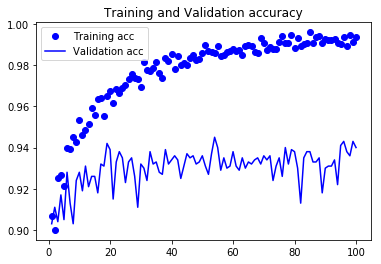

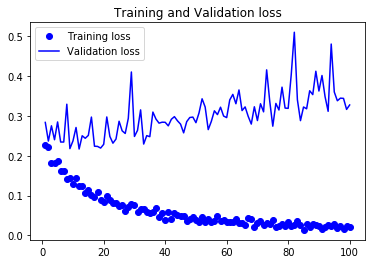

In [123]:
acc=history.history['acc']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
loss=history.history['loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [124]:
### smooth curves

def smooth_curve(points,factor=0.8):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

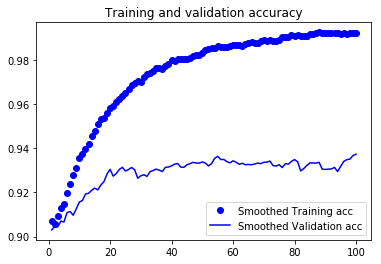

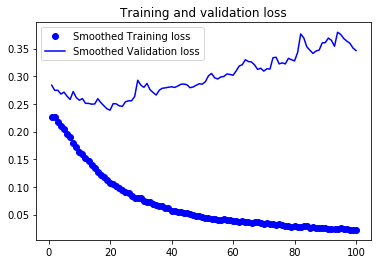

In [125]:
plt.plot(epochs,smooth_curve(acc),'bo',label='Smoothed Training acc')
plt.plot(epochs,smooth_curve(val_acc),'b',label='Smoothed Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,smooth_curve(loss),'bo',label='Smoothed Training loss')
plt.plot(epochs,smooth_curve(val_loss),'b',label='Smoothed Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [126]:
### evaluation on test data
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [127]:
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)

In [128]:
print('test acc:',test_acc)

test acc: 0.9349999940395355
